<a href="https://colab.research.google.com/github/mrhassan0/Prediction-of-Obesity-Levels-Based-On-Eating-Habits-and-Physical-Condition/blob/main/Final_Prediction_of_Obesity_Levels_Based_On_Eating_Habits_and_Physical_Condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

The "Estimation of Obesity Levels Based on Eating Habits and Physical Condition" dataset is designed for solving a classification problem where the goal is to predict an individual's obesity level based on various features. These features include factors related to eating habits, physical condition, and other lifestyle factors. The target variable is the obesity level, which is categorized into different classes, providing an opportunity to build a model that classifies individuals into these obesity categories. This problem involves extracting meaningful patterns from these features to make accurate predictions.

# 2. Dataset Description and Import

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Importing dataset from UCI repo directly**

In [759]:
pip install ucimlrepo


In [760]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

**Corelation of numeric features**


--- Correlation Heatmap ---


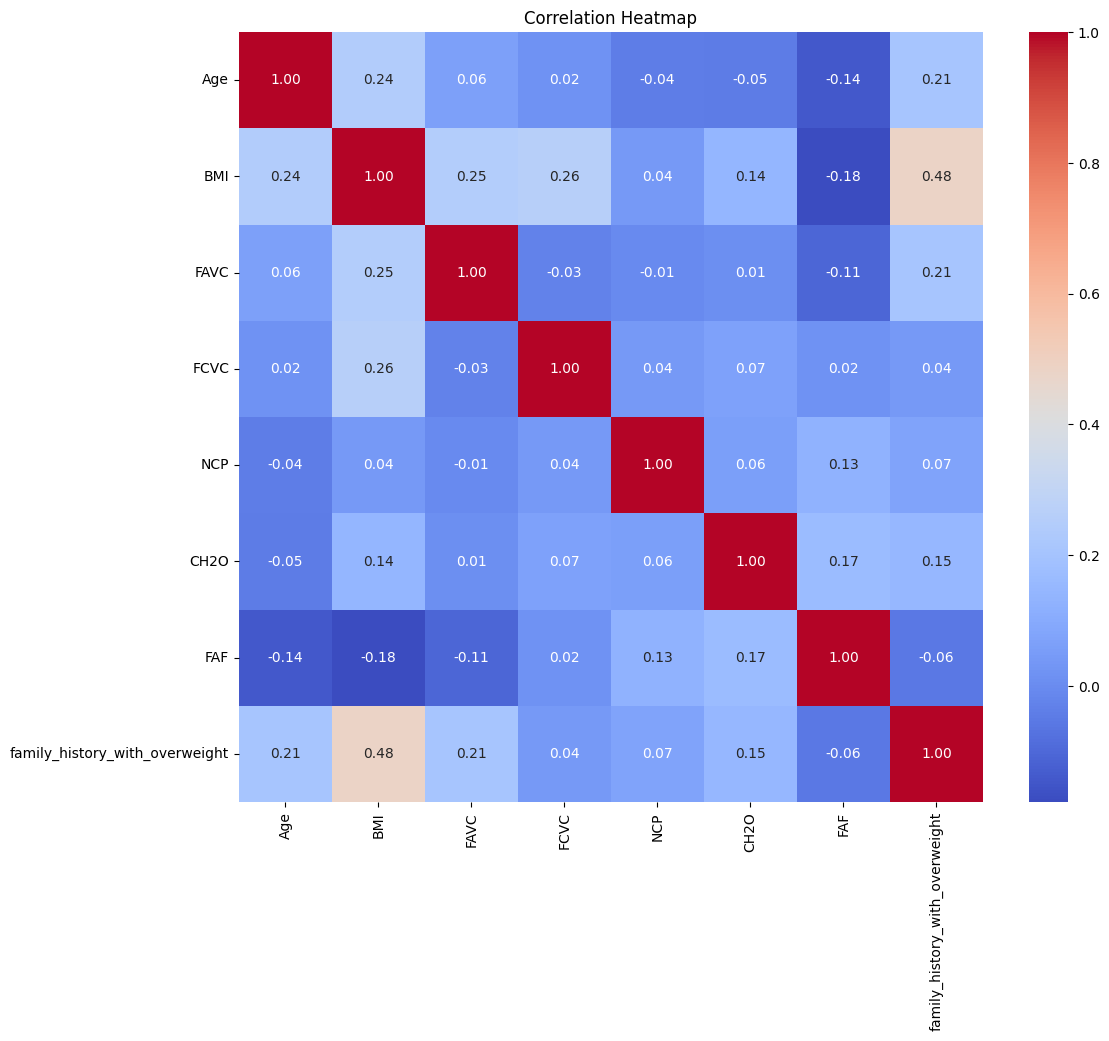

In [761]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Correlation Heatmap ---
print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(12, 10))

# Must be numeric
numeric_data = data.select_dtypes(include=['number'])

#corelation_calculation
correlation_matrix = numeric_data.corr()

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()




**Datasheet barchart**

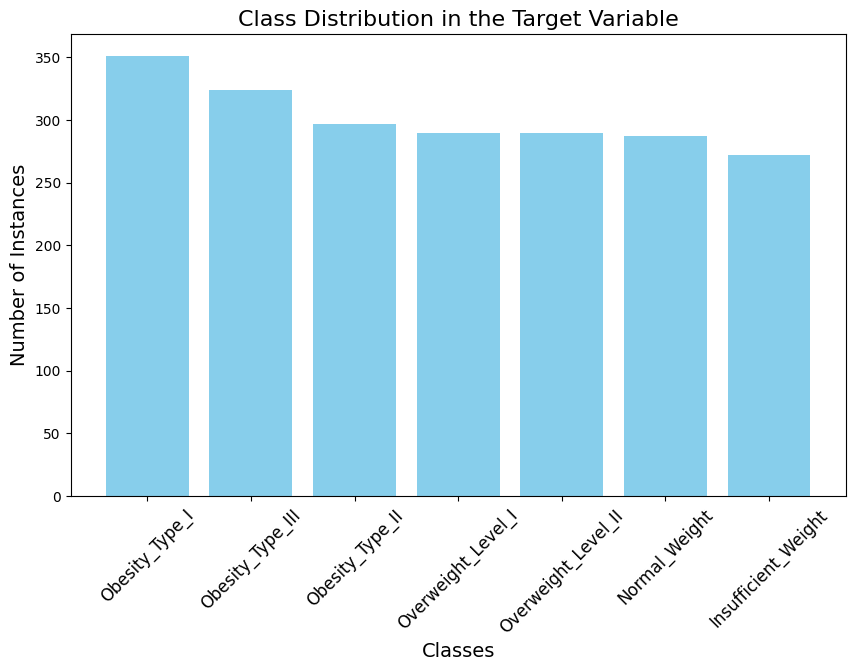

In [762]:
import matplotlib.pyplot as plt
target = y.copy()
# Ensure the LabelEncoder is fitted on the target column
label_encoder = LabelEncoder()
target['NObeyesdad'] = label_encoder.fit_transform(target['NObeyesdad'])

# Count the number of instances for each class in the target feature
class_counts = target['NObeyesdad'].value_counts()

# Decode numeric labels back to their original class names
class_labels = label_encoder.inverse_transform(class_counts.index)

# Bar chart for class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts.values, color='skyblue')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.title('Class Distribution in the Target Variable', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()


# 3. Dataset Pre Processing

In [763]:
import pandas as pd
import numpy as np

In [764]:
# Convert features (X) to a DataFrame
data = X.copy()

In [765]:
target = y.copy() #target to a dataframe
print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  


In [766]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (2111, 16)


In [767]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


**Dropping Columns**

Here we have dropped the 04 columns as mentioned below to simplify the dataset as for prediction of obesity levels this 04 columns are irrelevant or less relavent

In [768]:
columns_to_drop = ['SMOKE','SCC','TUE','MTRANS']  # Column names to drop
data = data.drop(columns=columns_to_drop, axis=1)

In [769]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'CALC'],
      dtype='object')


**BMI Calculation and replacing Weight and Height with BMI**

In [770]:
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

In [771]:
print(data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'CALC', 'BMI'],
      dtype='object')


In [772]:
data = data.drop(['Weight', 'Height'], axis=1)

In [773]:
print(data.columns)

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'CH2O', 'FAF', 'CALC', 'BMI'],
      dtype='object')


**Rearranging Data Columns**

In [774]:
cols = list(data.columns)

# Find the index of 'BMI' and 'family_history_with_overweight'
bmi_index = cols.index('BMI')
fhwo_index = cols.index('family_history_with_overweight')

# Swap the positions of 'BMI' and 'family_history_with_overweight'
cols[bmi_index], cols[fhwo_index] = cols[fhwo_index], cols[bmi_index]

# Reorder the DataFrame columns
data = data[cols]

In [775]:
print(data.columns)

Index(['Gender', 'Age', 'BMI', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF',
       'CALC', 'family_history_with_overweight'],
      dtype='object')


**Replacing data columns with values yes or no with 1 and 0**

In [776]:
yes_no_columns = ['FAVC', 'family_history_with_overweight']
# Replace 'yes' with 1 and 'no' with 0, and ensure the columns are converted to integers
#data[yes_no_columns] = data[yes_no_columns].replace({'yes': 1, 'no': 0}).astype(int)
data[yes_no_columns] = data[yes_no_columns].replace({'yes': 1, 'no': 0})

<ipython-input-776-e8c1670b090c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_columns] = data[yes_no_columns].replace({'yes': 1, 'no': 0})


In [777]:
print(data.head())

   Gender   Age        BMI  FAVC  FCVC  NCP       CAEC  CH2O  FAF        CALC  \
0  Female  21.0  24.386526     0   2.0  3.0  Sometimes   2.0  0.0          no   
1  Female  21.0  24.238227     0   3.0  3.0  Sometimes   3.0  3.0   Sometimes   
2    Male  23.0  23.765432     0   2.0  3.0  Sometimes   2.0  2.0  Frequently   
3    Male  27.0  26.851852     0   3.0  3.0  Sometimes   2.0  2.0  Frequently   
4    Male  22.0  28.342381     0   2.0  1.0  Sometimes   2.0  0.0   Sometimes   

   family_history_with_overweight  
0                               1  
1                               1  
2                               1  
3                               0  
4                               0  


In [778]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

**Encoding**

Converts categorical columns into numeric values using one-hot encoding, which is necessary for machine learning models

**One Hot Encoding**

In [779]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical features
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True) #dropping every first column after encoding to avoid redundency

In [780]:
print(data.head())

    Age        BMI  FAVC  FCVC  NCP  CH2O  FAF  \
0  21.0  24.386526     0   2.0  3.0   2.0  0.0   
1  21.0  24.238227     0   3.0  3.0   3.0  3.0   
2  23.0  23.765432     0   2.0  3.0   2.0  2.0   
3  27.0  26.851852     0   3.0  3.0   2.0  2.0   
4  22.0  28.342381     0   2.0  1.0   2.0  0.0   

   family_history_with_overweight  Gender_Male  CAEC_Frequently  \
0                               1        False            False   
1                               1        False            False   
2                               1         True            False   
3                               0         True            False   
4                               0         True            False   

   CAEC_Sometimes  CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  
0            True    False            False           False     True  
1            True    False            False            True    False  
2            True    False             True           False    False  
3           

# 4. Feature Scaling

**Standard Scaling**

**Standard Scaler:**

$$\frac{X - mean}{\sigma}$$
where,
$$\sigma = standard \space deviation $$

**Why we use it ?**

-- There are assumed to be no or minimal extreme outliers in this dataset

In [781]:
# Identify numerical columns, excluding the target column
numerical_cols = [col for col in data.columns if col not in ['NObeyesdad'] and data[col].dtype in ['float64', 'int64']]

# Scale the numerical data
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [782]:
print(data.head())

        Age       BMI      FAVC      FCVC       NCP      CH2O       FAF  \
0 -0.522124 -0.663421 -2.759769 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -0.681937 -2.759769  1.088342  0.404153  1.618759  2.339750   
2 -0.206889 -0.740967 -2.759769 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582 -0.355619 -2.759769  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507 -0.169522 -2.759769 -0.785019 -2.167023 -0.013073 -1.188039   

   family_history_with_overweight  Gender_Male  CAEC_Frequently  \
0                        0.472291        False            False   
1                        0.472291        False            False   
2                        0.472291         True            False   
3                       -2.117337         True            False   
4                       -2.117337         True            False   

   CAEC_Sometimes  CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  
0            True    False            False           False     True  
1   

# 5. Dataset Spliting

In [783]:
# Split the data into features and target
features = data
# Train-test split [Test size 30% =0.3 ]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42) #random state = 42 , helps us to train/test spliting static , no change on different running the code


In [784]:
print(X_train.shape)
print(X_test.shape)

(1477, 15)
(634, 15)


In [785]:
print(y_train.shape)
print(y_test.shape)

(1477, 1)
(634, 1)


In [786]:
pd.DataFrame(X_train)

,Age,BMI,FAVC,FCVC,NCP,CH2O,FAF,family_history_with_overweight,Gender_Male,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
1930,0.263145,1.259434,0.362349,1.088342,0.404153,-0.860402,-1.072747,0.472291,False,False,True,False,False,True,False
1803,0.265964,1.385957,0.362349,1.088342,0.404153,1.249987,-1.188039,0.472291,False,False,True,False,False,True,False
1198,-0.994977,-0.187296,0.362349,0.914235,0.404153,1.195866,0.246392,0.472291,True,False,True,False,False,True,False
15,-0.364507,-0.856838,-2.759769,1.088342,0.404153,-0.013073,1.163820,0.472291,False,False,False,False,False,True,False
816,-0.135710,-0.351478,0.362349,-0.785019,0.404153,-0.013073,-1.036152,0.472291,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.257405,1.160456,0.362349,1.027083,0.404153,0.851855,-0.064653,0.472291,True,False,True,False,False,True,False
1095,-0.206889,-0.257359,0.362349,-0.785019,-1.229118,-0.991769,-0.143904,0.472291,True,False,True,False,False,True,False
1130,-0.208489,-0.039379,0.362349,-0.785019,0.404153,-0.013073,-1.015273,0.472291,False,False,True,False,False,False,True
1294,-0.206889,0.271514,0.362349,-0.675077,0.355306,0.004218,-0.187254,0.472291,False,False,True,False,False,False,True


In [787]:
pd.DataFrame(X_test)

,Age,BMI,FAVC,FCVC,NCP,CH2O,FAF,family_history_with_overweight,Gender_Male,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
544,-0.615612,-1.533790,0.362349,-0.785019,1.550889,-0.235117,2.187029,0.472291,False,True,False,False,False,False,True
1987,0.265964,1.540657,0.362349,1.088342,0.404153,1.136250,-1.188039,0.472291,False,False,True,False,False,True,False
420,-0.994977,-1.519347,0.362349,1.088342,1.689740,-0.013073,1.163820,0.472291,True,False,True,False,False,True,False
527,-0.522124,-1.438489,0.362349,1.088342,-2.167023,-1.644905,-1.188039,-2.117337,False,True,False,False,False,True,False
196,-0.364507,-0.691296,-2.759769,-0.785019,0.404153,-0.013073,-0.012109,0.472291,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,-0.367695,-0.483094,0.362349,-0.385740,0.404153,0.063241,1.366722,0.472291,False,False,True,False,False,True,False
518,-0.127883,-1.513469,-2.759769,0.322960,0.404153,0.107761,0.787446,-2.117337,False,True,False,False,False,False,True
781,-0.045493,-0.546222,0.362349,0.907647,0.404153,-0.747510,-1.188039,-2.117337,False,False,True,False,False,True,False
334,-0.994977,-0.560847,0.362349,-0.785019,0.404153,-0.013073,-0.012109,-2.117337,False,True,False,False,True,False,False


In [788]:
pd.DataFrame(y_train)

,NObeyesdad
1930,Obesity_Type_III
1803,Obesity_Type_III
1198,Overweight_Level_II
15,Normal_Weight
816,Overweight_Level_I
...,...
1638,Obesity_Type_II
1095,Overweight_Level_II
1130,Overweight_Level_II
1294,Obesity_Type_I


In [789]:
pd.DataFrame(y_test)

,NObeyesdad
544,Insufficient_Weight
1987,Obesity_Type_III
420,Insufficient_Weight
527,Insufficient_Weight
196,Normal_Weight
...,...
936,Overweight_Level_I
518,Insufficient_Weight
781,Overweight_Level_I
334,Overweight_Level_I


# 6. Model Training and Testing - KNN, Logistic Regression, Decision Tree, Naive Bayes

In [790]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [791]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [792]:
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#y_train = label_encoder.fit_transform(y_train)
#y_test = label_encoder.transform(y_test)

**KNN**

In [793]:
# --- K-Nearest Neighbors (KNN) ---
print("\n--- K-Nearest Neighbors (KNN) ---")
knn = KNeighborsClassifier() #calling KNN
knn.fit(X_train, y_train)  #training dataset
knn_predictions = knn.predict(X_test) #testing to get predictions

print("Accuracy:", accuracy_score(y_test, knn_predictions)) #prediction comparison with testing target values
print("Classification Report:\n", classification_report(y_test, knn_predictions, zero_division=0)) #report generation


--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.805993690851735
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.76      0.87      0.81        86
      Normal_Weight       0.65      0.52      0.57        93
     Obesity_Type_I       0.83      0.85      0.84       102
    Obesity_Type_II       0.90      0.95      0.93        88
   Obesity_Type_III       1.00      1.00      1.00        98
 Overweight_Level_I       0.73      0.70      0.72        88
Overweight_Level_II       0.71      0.72      0.72        79

           accuracy                           0.81       634
          macro avg       0.80      0.80      0.80       634
       weighted avg       0.80      0.81      0.80       634



**Logistic Regression**

In [794]:
from sklearn.multiclass import OneVsRestClassifier
#OneVsRestClassifier: Fits one logistic regression model per target class and predicts for each class independently.

print("\n--- Logistic Regression ---")
logistic_model = OneVsRestClassifier(LogisticRegression()) #calling logistic regression
logistic_model.fit(X_train, y_train)                #training dataset
logistic_predictions = logistic_model.predict(X_test) #prediction

print("Accuracy:", accuracy_score(y_test, logistic_predictions)) #prediction and real target score comparison
print("Classification Report:\n", classification_report(y_test, logistic_predictions, zero_division=0))
#By setting zero_division=0, this will instead return 0 (in cases for division by 0), class's precision rather than triggering a warning.




--- Logistic Regression ---
Accuracy: 0.7697160883280757
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.87      0.98      0.92        86
      Normal_Weight       0.77      0.55      0.64        93
     Obesity_Type_I       0.68      0.69      0.68       102
    Obesity_Type_II       0.82      0.99      0.90        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.60      0.64      0.62        88
Overweight_Level_II       0.61      0.54      0.57        79

           accuracy                           0.77       634
          macro avg       0.76      0.77      0.76       634
       weighted avg       0.77      0.77      0.76       634



**Decision Tree**

In [795]:
print("\n--- Decision Tree Classifier ---")
decision_tree = DecisionTreeClassifier(random_state=42)
#when you run the code, you'll get the same results each time ---> static [controlling randomness]
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, decision_tree_predictions))
print("Classification Report:\n", classification_report(y_test, decision_tree_predictions))



--- Decision Tree Classifier ---
Accuracy: 0.9763406940063092
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        86
      Normal_Weight       0.96      0.99      0.97        93
     Obesity_Type_I       0.98      0.95      0.97       102
    Obesity_Type_II       0.95      0.98      0.96        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.99      0.95      0.97        88
Overweight_Level_II       0.96      1.00      0.98        79

           accuracy                           0.98       634
          macro avg       0.98      0.98      0.98       634
       weighted avg       0.98      0.98      0.98       634



**Naive Bayes**

In [796]:
# --- 4. Naive Bayes ---

print("\n--- Naive Bayes ---")
naive_bayes = GaussianNB()     #naive bayes call
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)

print("Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Classification Report:\n", classification_report(y_test, naive_bayes_predictions))



--- Naive Bayes ---
Accuracy: 0.7917981072555205
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.75      0.95      0.84        86
      Normal_Weight       0.71      0.61      0.66        93
     Obesity_Type_I       0.62      0.79      0.70       102
    Obesity_Type_II       0.84      0.98      0.91        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.87      0.77      0.82        88
Overweight_Level_II       0.86      0.39      0.54        79

           accuracy                           0.79       634
          macro avg       0.81      0.78      0.78       634
       weighted avg       0.81      0.79      0.78       634



# 7. Model Selection and Comparison Analysis

**Accuracy Comparison**

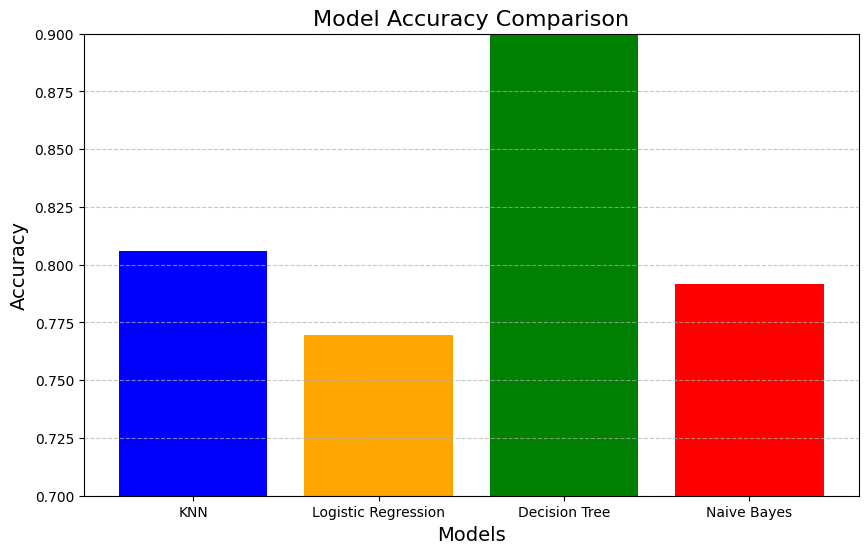

In [797]:
import matplotlib.pyplot as plt

# Model accuracy values
model_names = ['KNN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracies = [0.805993690851735, 0.7697160883280757
,0.9763406940063092,  0.7917981072555205]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.7, 0.9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Precision and Recall Comparison**

Recall: focuses on identifying all actual positive instances.

Precision: focuses on the accuracy of positive predictions.


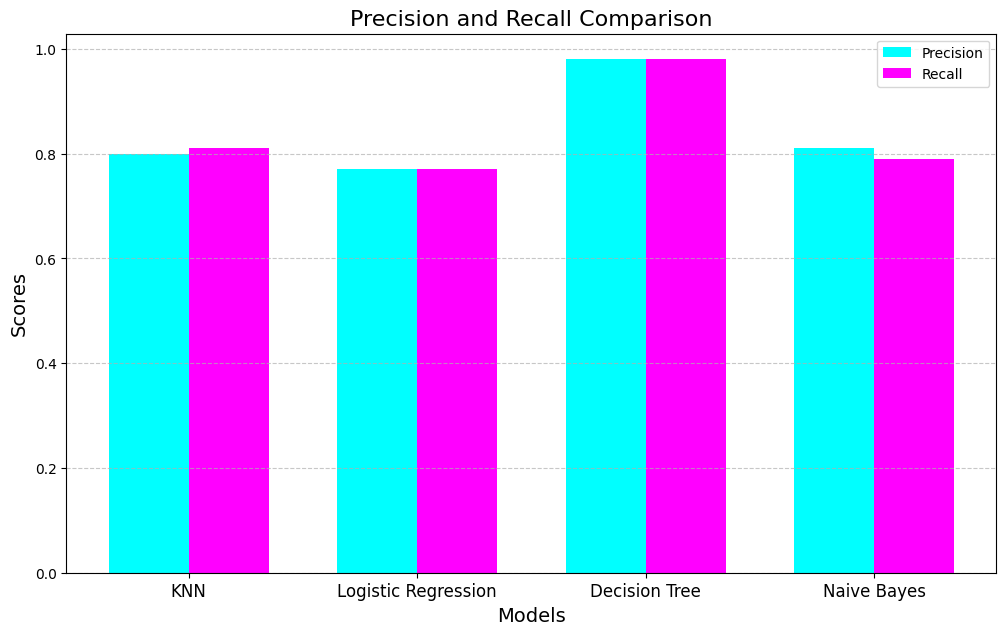

In [798]:
import numpy as np

#precision and recall data
precision = [0.80, 0.77, 0.98, 0.81]
recall = [0.81, 0.77, 0.98, 0.79]

x = np.arange(len(model_names))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, precision, width, label='Precision', color='cyan')
rects2 = ax.bar(x + width/2, recall, width, label='Recall', color='magenta')

# Add labels and title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Precision and Recall Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=12)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Confusion Matrix**

The diagonal cells (from top-left to bottom-right) represent the correct predictions for each class

Rows represent the true labels (what the actual category is).
Columns represent the predicted labels (what the model guessed).

In [799]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.show()

# List of class labels
labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
          'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


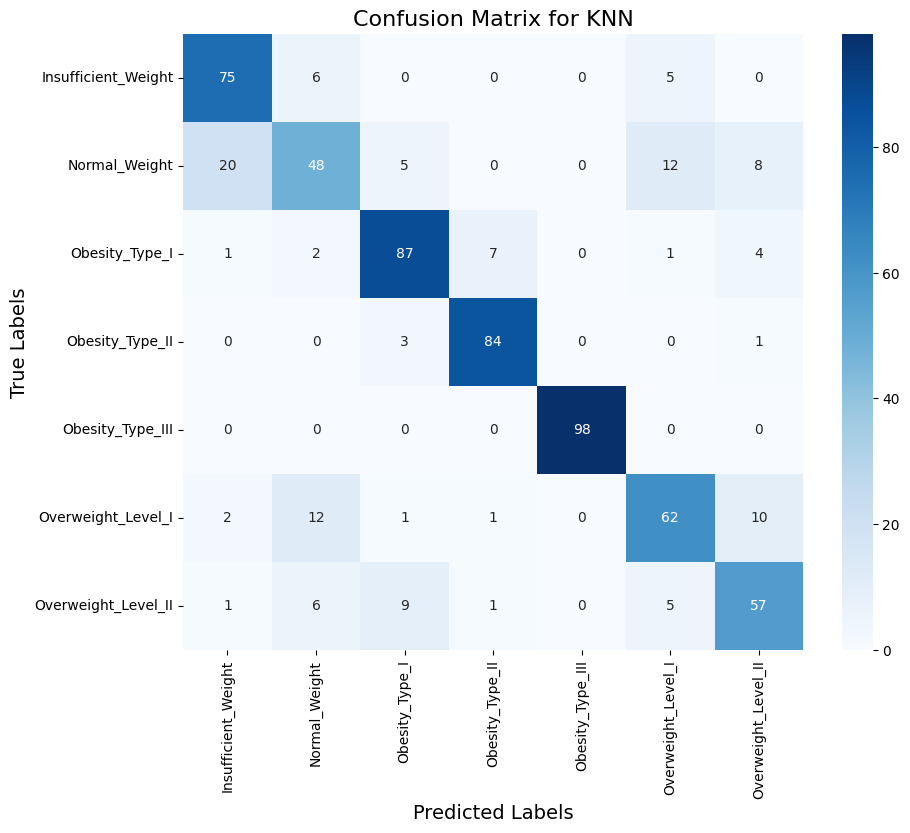

In [800]:
plot_confusion_matrix("KNN", y_test, knn.predict(X_test), labels)

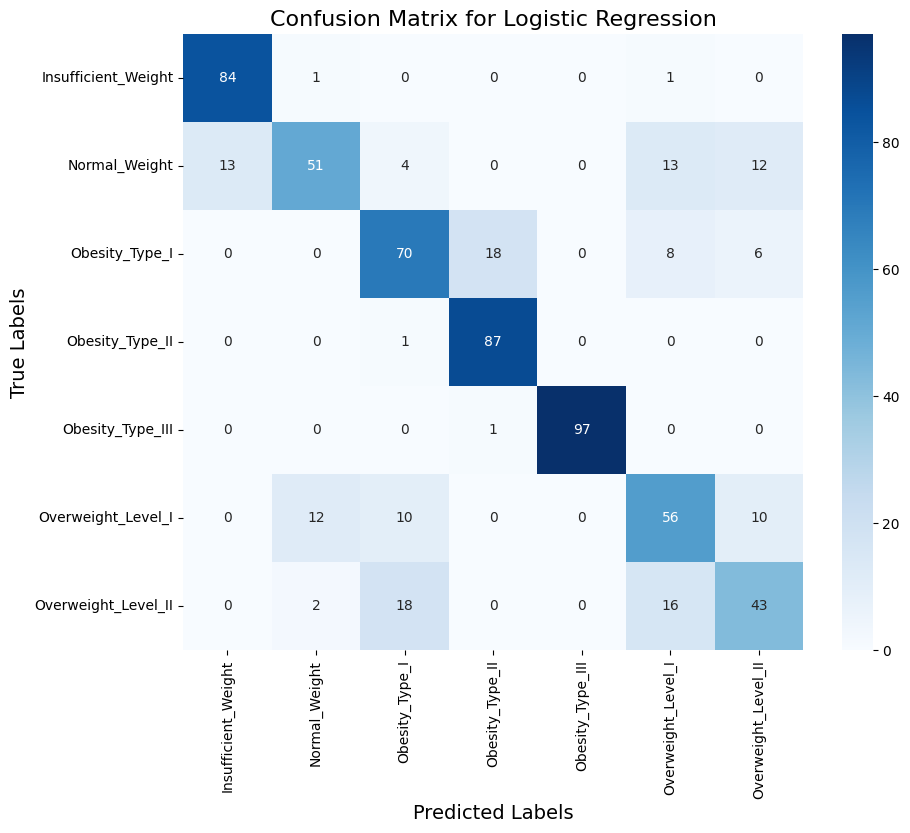

In [801]:
plot_confusion_matrix("Logistic Regression", y_test, logistic_model.predict(X_test), labels)

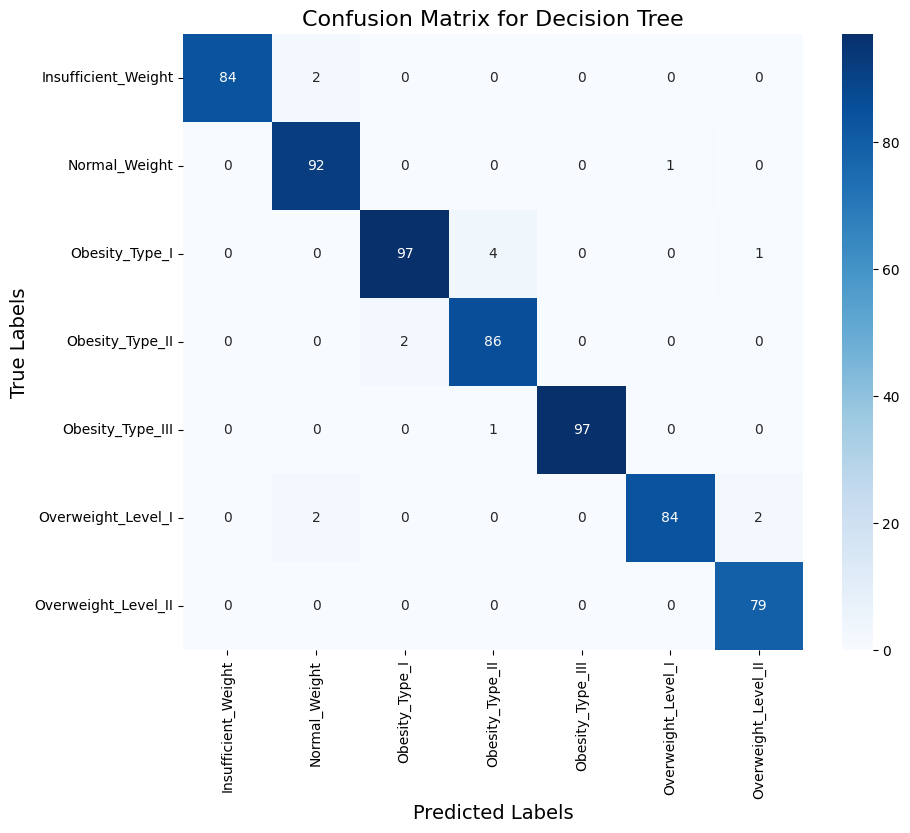

In [802]:
plot_confusion_matrix("Decision Tree", y_test, decision_tree.predict(X_test), labels)

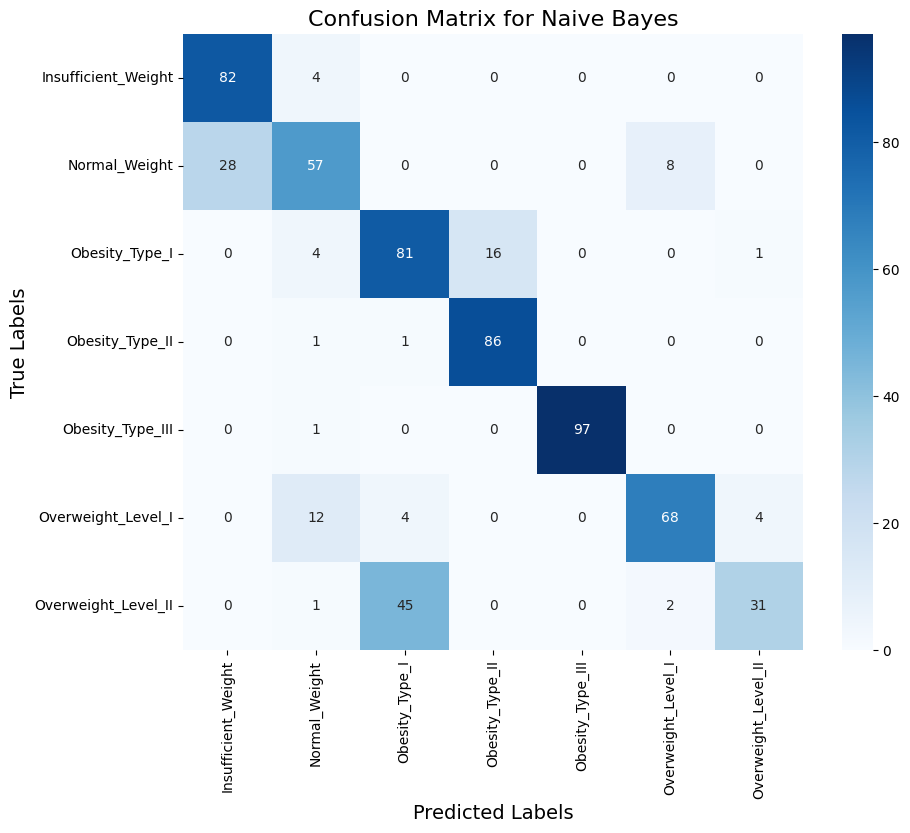

In [803]:
plot_confusion_matrix("Naive Bayes", y_test, naive_bayes.predict(X_test), labels)

# 8. Conclusion

The observed difference in accuracy between KNN, Decision Tree, and other models is likely due to a combination of factors, including data characteristics, model strengths and weaknesses, and preprocessing steps.

With proper preprocessing, feature selection, and classification techniques, this model can be used to predict obesity risk based on lifestyle factors, potentially supporting health professionals in preventive healthcare and personalized treatment plans. The results may offer valuable insights into the role of eating habits and physical condition in obesity classification, ultimately contributing to public health efforts.

Estimation of Obesity Levels Based On Eating Habits and Physical Condition  [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.